In [24]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import plotly as py
from shapely.geometry import Point, Polygon
import plotly.express as px
import requests
import folium
from pykml import parser


In [2]:
graph_city = ox.graph_from_place('Amsterdam')

In [3]:
city_name = "Centrum Amsterdam"
water = ox.geometries.geometries_from_place( city_name, tags={'natural' : 'water'})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30732\1264593962.py:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  water = ox.geometries.geometries_from_place( city_name, tags={'natural' : 'water'})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30732\1467777487.py:1: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


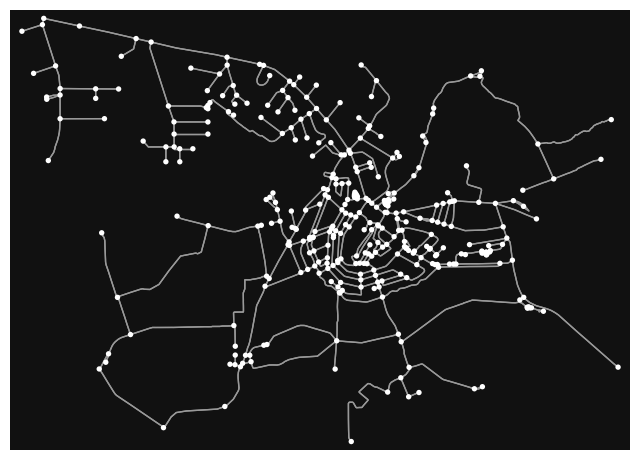

In [4]:
ox.config(use_cache=True, log_console=True)
graph_water = ox.graph_from_place('Amsterdam', custom_filter='["waterway"~"canal|river"]')
fig, ax = ox.plot_graph(graph_water)

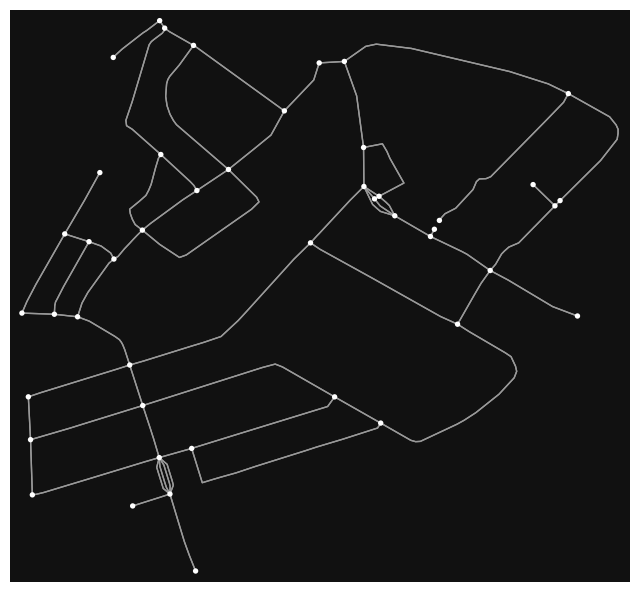

In [5]:
graph_water = ox.graph_from_point(ox.geocoder.geocode("Henri Polaklaan, Amsterdam"), custom_filter='["waterway"~"canal|river"]', dist=1000, simplify=True)
fig, ax = ox.plot_graph(graph_water)

In [6]:
graph_water.nodes()
nodes = ox.graph_to_gdfs(graph_water, edges=False)
nodes[['x', 'y']]

,x,y
osmid,,
46367195,4.898466,52.367328
60740166,4.901207,52.365780
60740168,4.902760,52.362808
117738509,4.896087,52.361612
178249904,4.904671,52.359167
178249906,4.901892,52.364479
178249922,4.897245,52.367410
178261156,4.895993,52.363383
178261159,4.895877,52.364759


In [7]:
with open('route.kml', 'rt') as f:
    doc = parser.parse(f)

root = doc.getroot()

for placemark in root.Document.Placemark:
    coordinates = placemark.LineString.coordinates
    print(coordinates)

i = str(coordinates).strip()
p = i.split(' ')


				4.915361336704143,52.37316497905132,0 4.913696980217992,52.37253771912411,0 4.913525647788608,52.37144644958019,0 4.906010987898397,52.36676865286423,0 4.901294202134348,52.3658296124527,0 4.901812830197903,52.36446928299983,0 4.895957354917854,52.36339061542211,0 4.896032912842152,52.36160762157507,0 4.904424686067406,52.36307377890162,0 4.905019962445816,52.36192303707652,0 4.914547625284458,52.3638820485437,0 4.916123532008434,52.36331863805842,0 4.918849502487898,52.36403427769025,0 4.921170907042183,52.36520709498112,0 4.921596709461726,52.36579328661398,0 4.92125343636266,52.36610999284472,0 4.918428593150295,52.36711910462148,0 4.920093829615855,52.36888117062342,0 4.913930585129926,52.37129386062114,0 
			


In [8]:
route_points = []
for n in p:
    coor = n.split(',')
    route_points.append((float(coor[0]),float(coor[1])))

print(route_points)

[(4.915361336704143, 52.37316497905132), (4.913696980217992, 52.37253771912411), (4.913525647788608, 52.37144644958019), (4.906010987898397, 52.36676865286423), (4.901294202134348, 52.3658296124527), (4.901812830197903, 52.36446928299983), (4.895957354917854, 52.36339061542211), (4.896032912842152, 52.36160762157507), (4.904424686067406, 52.36307377890162), (4.905019962445816, 52.36192303707652), (4.914547625284458, 52.3638820485437), (4.916123532008434, 52.36331863805842), (4.918849502487898, 52.36403427769025), (4.921170907042183, 52.36520709498112), (4.921596709461726, 52.36579328661398), (4.92125343636266, 52.36610999284472), (4.918428593150295, 52.36711910462148), (4.920093829615855, 52.36888117062342), (4.913930585129926, 52.37129386062114)]


In [10]:
swim_route = []
for i in range(0,len(route_points)):
    origin_point = (route_points[i][0],route_points[i][1])
    origin_node = ox.nearest_nodes(graph_water, route_points[i][0], route_points[i][1])
    swim_route.append(origin_node)

In [11]:
swim_route

[252142901,
 252142901,
 331854233,
 60740166,
 60740166,
 178249906,
 178261156,
 117738509,
 323968073,
 331960285,
 252100239,
 252100239,
 252100239,
 3781170134,
 3781170134,
 3781170134,
 3781170134,
 2853837615,
 323901705]

In [12]:
swim_route_update = []
previous_node = None
for node in swim_route:
    if node != previous_node:
        swim_route_update.append(node)
    previous_node = node
print(swim_route_update)

[252142901, 331854233, 60740166, 178249906, 178261156, 117738509, 323968073, 331960285, 252100239, 3781170134, 2853837615, 323901705]


In [13]:
swim_route_update = [252142901, 331854233, 60740166, 178249906, 178261156, 117738509, 323968073,  252100239, 3781170134, 2853837615, 323901705]

In [14]:
swim_route_path = []
for i in range(len(swim_route_update) - 1):
    path = nx.shortest_path(graph_water, swim_route_update[i], swim_route_update[i+1])
    swim_route_path.extend(path[1:])
print(swim_route_path)

[331854233, 323929882, 60740166, 178249906, 178261156, 117738509, 60740168, 323968073, 252100239, 3781170134, 2853837615, 323909176, 252116496, 323901705]


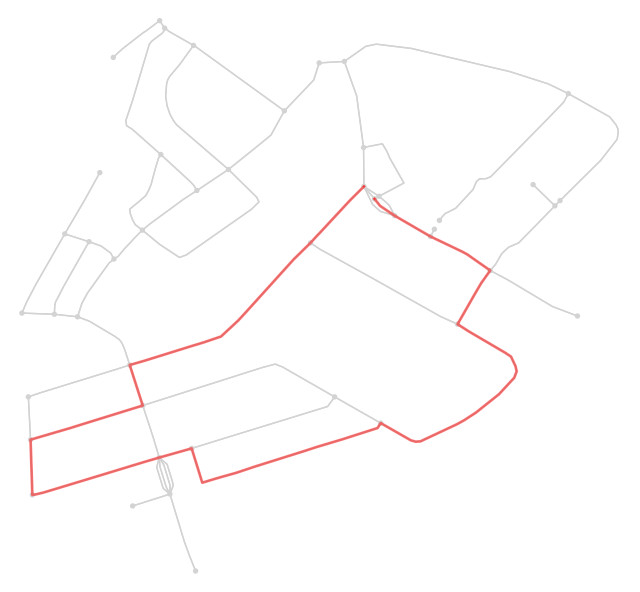

In [15]:
swim_route_fig, ax = ox.plot_graph_route(graph_water, swim_route_path, route_linewidth=2, route_color='red', show=True, orig_dest_size=2, bgcolor='white', node_color="lightgrey", edge_color="lightgrey",  close=False)

In [16]:
x_co = 0.0
y_co = 0.0

for node in swim_route_path:
    x_co += graph_water.nodes[node]['x']
    y_co += graph_water.nodes[node]['y']

ave_x = x_co / len(swim_route_path)
ave_y = y_co / len(swim_route_path)
center_point = (ave_x, ave_y) 

In [17]:
center_point

(4.9089924428571425, 52.366699635714276)

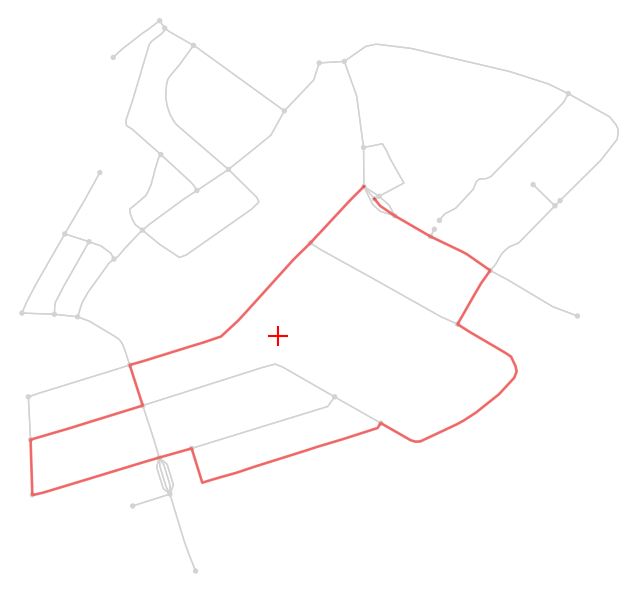

In [18]:
swim_route_fig, ax = ox.plot_graph_route(graph_water, swim_route_path, route_linewidth=2, route_color='red', show=False, orig_dest_size=2, bgcolor='white', node_color="lightgrey", edge_color="lightgrey",  close=False)
ax.scatter(ave_x, ave_y, c='red',marker = "+", s=200) 
plt.show()

In [19]:
start_point = graph_water.nodes[swim_route_path[0]]
end_point = graph_water.nodes[swim_route_path[-1]]

In [20]:
start_point

{'y': 52.3715129, 'x': 4.9135219, 'street_count': 5}

In [21]:
bus_stop = ox.features.features_from_point((start_point['y'], start_point['x']), tags={'public_transport':[ 'stop_position']}, dist=500)
bus_stop.to_csv("bus_stop.csv") 
print(bus_stop) 

                         bus                           name public_transport  \
element_type osmid                                                             
node         46395197    yes   Amsterdam, Prins Hendrikkade    stop_position   
             331854558   yes        Amsterdam, Kadijksplein    stop_position   
             838046143   yes  Amsterdam, Wittenburgergracht    stop_position   
             838046147   yes  Amsterdam, Wittenburgergracht    stop_position   
             1280741311  yes        Amsterdam, Kadijksplein    stop_position   
             2087644362  yes   Amsterdam, Kattenburgerplein    stop_position   
             2087644827  yes   Amsterdam, Kattenburgerplein    stop_position   
             4457168573  yes  Amsterdam, Kattenburgerstraat    stop_position   
             4621705796  yes  Amsterdam, Kattenburgerstraat    stop_position   
             4629696011  yes           Amsterdam, IJ tunnel    stop_position   

                                       

In [22]:
bus_stop_point = bus_stop.iloc[2, bus_stop.columns.get_loc('geometry')]
print(type(bus_stop_point))
print(bus_stop_point)
geo_df_bus_list = [[bus_stop_point.xy[1][0], bus_stop_point.xy[0][0]] for bus_stop_point in bus_stop.geometry]
print(geo_df_bus_list)

for i, row in bus_stop.iterrows():
    print(i)

<class 'shapely.geometry.point.Point'>
POINT (4.9207898 52.3691024)
[[52.373463, 4.9065518], [52.3709246, 4.913366], [52.3691024, 4.9207898], [52.3694986, 4.9196296], [52.3708094, 4.9134932], [52.3706236, 4.9163389], [52.3707527, 4.915926], [52.372718, 4.9184891], [52.372271, 4.9179263], [52.3722719, 4.9094406]]
('node', 46395197)
('node', 331854558)
('node', 838046143)
('node', 838046147)
('node', 1280741311)
('node', 2087644362)
('node', 2087644827)
('node', 4457168573)
('node', 4621705796)
('node', 4629696011)


In [45]:
AMS = folium.Map(location=(52.3737966,4.9148386), zoom_start=14, zoom_control=True, control_scale=True,tiles="CartoDB positron")

In [38]:
i = 0
for row_index, row in bus_stop.iterrows():
    mark =  folium.Marker(
                location=geo_df_bus_list[i],
                icon=folium.Icon(icon="car")
            )
    i += 1
    AMS.add_child(mark)

In [40]:
AMS

In [41]:
restaurant = ox.features_from_point((start_point['y'], start_point['x']), tags={'amenity':['restaurant','pub', 'bar','cafe','fast_food']}, dist=500)
restaurant = restaurant.loc['node']
restaurant[['amenity','name','geometry']]

,amenity,name,geometry
osmid,,,
252111330,pub,Café Scharrebier,POINT (4.91111 52.37044)
252143918,restaurant,de Kluis,POINT (4.91170 52.37113)
299727761,cafe,Planetariumcafé,POINT (4.91319 52.36731)
539128135,restaurant,Eenvistweevis,POINT (4.91171 52.37082)
1055573894,restaurant,Greetje,POINT (4.90772 52.37158)
1074370472,restaurant,Babel,POINT (4.90815 52.37587)
1083536032,restaurant,Plancius,POINT (4.91279 52.36784)
1083536033,fast_food,Bread and Salt,POINT (4.91222 52.36718)
1083536034,restaurant,Bloem,POINT (4.91424 52.36885)


In [29]:
restaurant.to_csv("restaurant.csv") 

In [30]:
restaurant_point = restaurant.iloc[2, restaurant.columns.get_loc('geometry')]
print(type(restaurant_point))
print(restaurant_point)
geo_df_restaurant_list = [[restaurant_point.xy[1][0], restaurant_point.xy[0][0]] for restaurant_point in restaurant.geometry]
print(geo_df_restaurant_list)

for i, row in restaurant.iterrows():
    print(i)

<class 'shapely.geometry.point.Point'>
POINT (4.9131881 52.3673089)
[[52.3704414, 4.9111074], [52.371134, 4.9117046], [52.3673089, 4.9131881], [52.3708182, 4.9117106], [52.3715795, 4.9077158], [52.3758693, 4.9081512], [52.3678354, 4.9127949], [52.3671836, 4.9122197], [52.3688499, 4.9142406], [52.3716443, 4.9074757], [52.3673515, 4.9095413], [52.3701143, 4.9121073], [52.37171, 4.9076664], [52.3700544, 4.9106101], [52.369393, 4.920537], [52.3708862, 4.9163574], [52.3700326, 4.9119173], [52.3758457, 4.9077595], [52.3757981, 4.9085513], [52.368084, 4.9163971], [52.37295, 4.9166178], [52.3728801, 4.9165146], [52.375501, 4.9142739], [52.3702817, 4.9123276], [52.3714555, 4.9145436], [52.3742679, 4.9123687], [52.3758617, 4.9076499], [52.3702029, 4.9126142], [52.371226, 4.9158758], [52.3703276, 4.9108152], [52.3702271, 4.9122719], [52.3704071, 4.9110133], [52.3745106, 4.9142241], [52.3740965, 4.9145157], [52.3692464, 4.920886], [52.3700432, 4.9186289], [52.3696319, 4.9119695], [52.3741151, 4.91

In [47]:
i = 0
for row_index, row in restaurant.iterrows():
    mark =  folium.Marker(
                location=geo_df_restaurant_list[i],
                icon=folium.Icon(color="green"),
                popup=(
                "Name: "
                + str(restaurant.name[row_index])
                )
            )
    i += 1
    AMS.add_child(mark)

In [48]:
AMS

Calculate the centrality